# Image Classification-1

<h1> <center>Animal Classification Project:</center></h1>

#### 1. **Define Project Goal**: Classify images into Cat, Dog, and Horse categories.  
#### 2. **Setup Environment**: Install necessary libraries (TensorFlow, Keras, etc.) and organize project folders.  
#### 3. **Load Dataset**: Download and inspect the dataset structure.  
#### 4. **Preprocess Images**: Resize, normalize, and augment images to improve model generalization.  
#### 5. **Split Dataset**: Separate images into train, validation, and test sets.  
#### 6. **Design CNN Model**: Build a Convolutional Neural Network architecture for feature extraction and classification.  
#### 7. **Compile Model**: Choose optimizer (Adam), loss function (categorical cross-entropy), and evaluation metrics (accuracy).  
#### 8. **Train Model**: Fit the model using the training data and validate it using the validation set.  
#### 9. **Evaluate Model**: Test the model on unseen data to calculate accuracy and other metrics.  
#### 10. **Optimize Performance**: Adjust hyperparameters, use dropout, or fine-tune layers for better accuracy.  
#### 11. **Save Model**: Save the trained model in HDF5 format for future use.  
#### 12. **Build Prediction Pipeline**: Create a function to preprocess new images and make predictions.  
#### 13. **Develop Deployment App**: Build a web app using Streamlit or Flask for users to upload and classify images.  
#### 14. **Test Deployment**: Validate the app with various image inputs to ensure functionality.  
#### 15. **Document & Present**: Prepare a report with project details, results, and upload code to a repository (e.g., GitHub).

In [28]:
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for normalizet the image 

In [3]:
# Version Check
print("TensorFlow Version: ", tf.__version__)
print("NumPY Vesion :", np.__version__)
print("Pandas Version :", pd.__version__)

TensorFlow Version:  2.17.0
NumPY Vesion : 1.26.4
Pandas Version : 2.1.4


In [4]:
# import from path
dataset_path = '/kaggle/input/animal/Dataset'
# Define paths for training, validation, and test sets
train_dir = os.path.join(dataset_path, 'train')
validation_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

In [5]:
os.listdir()

['.virtual_documents']

In [6]:
# Print the contents of the main dataset directory
print("Contents of dataset path:", os.listdir(dataset_path))

# Print the contents of the train directory (if it exists)
if 'train' in os.listdir(dataset_path):
    print("Contents of train directory:", os.listdir(train_dir))
else:
    print("Train directory does not exist.")


Contents of dataset path: ['val', 'test', 'train']
Contents of train directory: ['horse', 'dog', 'cat']


In [7]:
# Data generators with resizing and normalization
train_datagen = ImageDataGenerator(rescale=1./255,       # Normalizing pixel values from 0 to 1 
                                   shear_range=0.2,      # Can moved horizontally by 20% of their vertical position
                                   zoom_range=0.2,       # the image can be randomly zoomed in or out by 20%
                                   horizontal_flip=True) # Each image has 50% change of being flipped horizontally
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Preparing the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize to 224x224
    batch_size=32,
    class_mode='categorical'
)

# Preparing the validation data
validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),  # Resize to 224x224
    batch_size=32,           # Number of images per batch
    class_mode='categorical' # Multiclass
)

# Preparing the test data
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize to 224x224
    batch_size=32,
    class_mode='categorical'
)

# Display the batch shapes
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break


Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 3)


In [8]:
# Required Libraries
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2 # Load Pre-trained model from application folder

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import MobileNetV2

# Define the input shape
input_tensor = Input(shape=(224, 224, 3))

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)  # Ensure correct activation function
x = layers.Dropout(0.5)(x)
output_tensor = layers.Dense(3, activation='softmax')(x)  # Three classes: Cat, Dog & Horse

# Define the model
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # Ensure correct spelling

# Print model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import MobileNetV2

# Define the input shape
input_tensor = Input(shape=(224, 224, 3))

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)  # Ensure correct activation function
x = layers.Dropout(0.5)(x)
output_tensor = layers.Dense(3, activation='softmax')(x)  # Three classes: Cat, Dog & Horse

# Define the model
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # Ensure correct spelling

# Print model summary
model.summary()



Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Now the model summary shows that the model has been successfully created and compiled using the pre-trained MobileNetV2 as the base model, and with your custom layers on top.

- Total Parameters: 2,422,339, divided by Trainable & Non-Trainable as shown

# Model Training

In [20]:
history = model.fit(
    train_generator,     # Use your training data generator
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 786ms/step - accuracy: 0.6439 - loss: 0.9518 - val_accuracy: 0.9418 - val_loss: 0.2076
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 617ms/step - accuracy: 0.9002 - loss: 0.3048 - val_accuracy: 0.9550 - val_loss: 0.1583
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 628ms/step - accuracy: 0.9148 - loss: 0.2549 - val_accuracy: 0.9815 - val_loss: 0.1094
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 620ms/step - accuracy: 0.9602 - loss: 0.1299 - val_accuracy: 0.9762 - val_loss: 0.1100
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 622ms/step - accuracy: 0.9573 - loss: 0.1236 - val_accuracy: 0.9841 - val_loss: 0.0881
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 599ms/step - accuracy: 0.9562 - loss: 0.1167 - val_accuracy: 0.9841 - val_loss: 0.0641
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - accuracy: 0.9739 - loss: 0.0743 - val_accuracy: 0.9894 - val_loss: 0.0551
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 618ms/step - accuracy: 0.9699 - loss: 0.0835 - val_accu

# Evaluate the Model

In [21]:
test_loss, test_acc = model.evaluate(test_generator,verbose=2 )
print(f'\nTest Accuracy : {test_acc * 100:.2f}%')

12/12 - 6s - 493ms/step - accuracy: 0.9888 - loss: 0.0428

Test Accuracy : 98.88%


# Save the Model

In [22]:
# Save the model in the native Keras format
model.save('nn_model.keras')

## Load the Model for Prediction:

In [24]:
# Load the saved model
model = tf.keras.models.load_model('nn_model.keras')

# Make Predictions
predictions = model.predict(test_generator)   # x_test
predicted_class = tf.argmax(predictions, axis = 1)
print(predicted_class)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 519ms/step
tf.Tensor(
[2 1 2 0 0 2 1 1 1 2 2 1 0 0 1 1 2 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 2 1 2 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 2 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 0 2 0 1 0 2
 0 1 1 1 1 1 0 2 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 2 1 0 1 0 0 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 2 1 1 1 2 0 1 0 1 1 1 2
 0 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 0 1 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 0 1 1 2 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 2 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 2 2 2 1 1 1
 1 0 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 0 0 1 2 1 1 2 2 1 1 2 0 1 1 1 1
 0 1 2 1 0 1 1 0 1 1 0 1 1 2 0 0 1 1 1 1 0 1 1 1 2 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1 1 1 0 1 1 1 0], shape=(358,), dtype=int64)


## Confusion Matrix

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 408ms/step


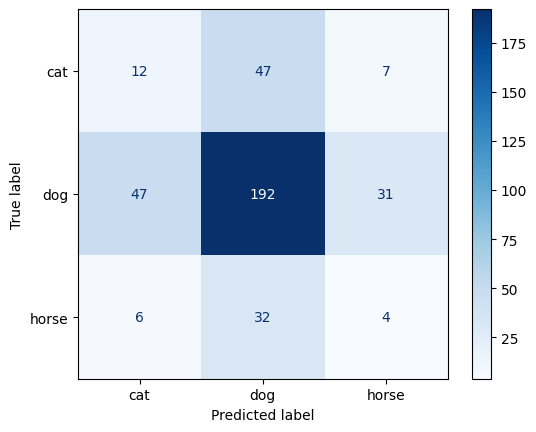

In [29]:
# Generate predictions on the validation set
val_predictions = model.predict(validation_generator)
predicted_classes = np.argmax(val_predictions, axis=1)

# Get True Classes
true_classes = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step


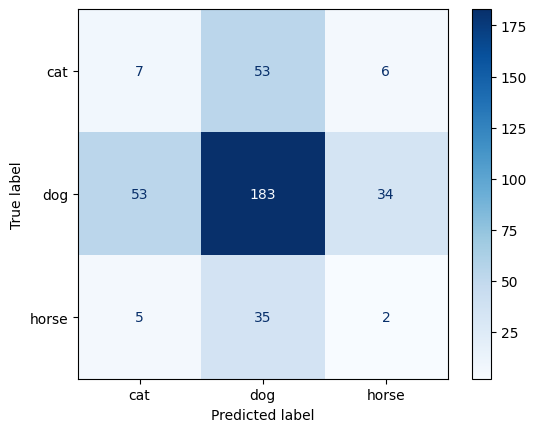

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the validation set
val_predictions = model.predict(validation_generator)
predicted_classes = np.argmax(val_predictions, axis=1)

# Get true classes
true_classes = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Visualiation

Plotting Accuracy and Loss:

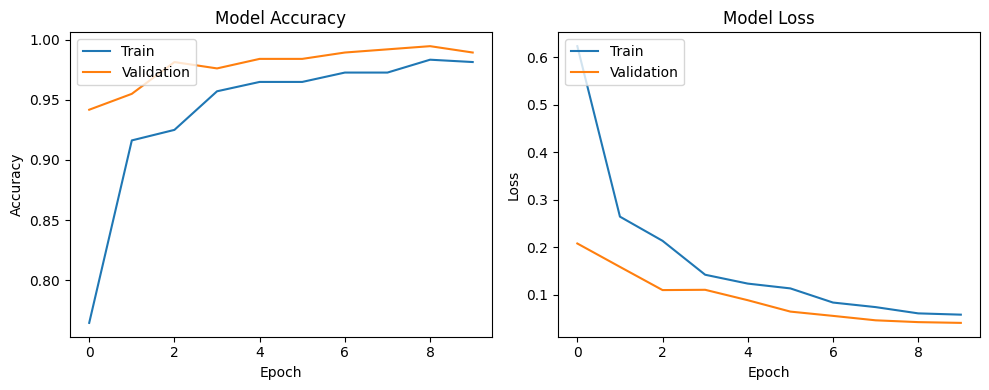

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')


plt.tight_layout()
plt.show()

Display Misclassified Images

#### Display Misclassified Images

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step


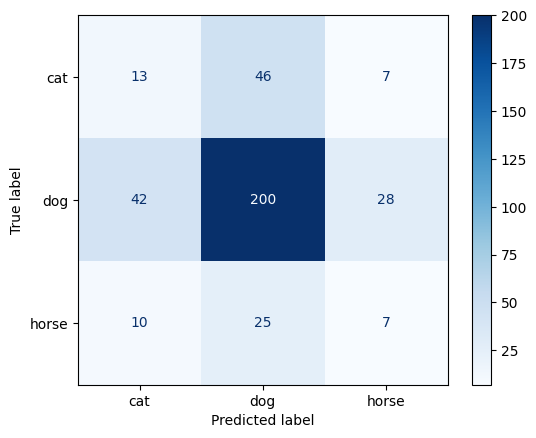

In [37]:
# First, generate predictions and identify misclassified images:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the validation set
val_predictions = model.predict(validation_generator)
predicted_classes = np.argmax(val_predictions, axis=1)

# Get true classes
true_classes = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Get the indices of misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]


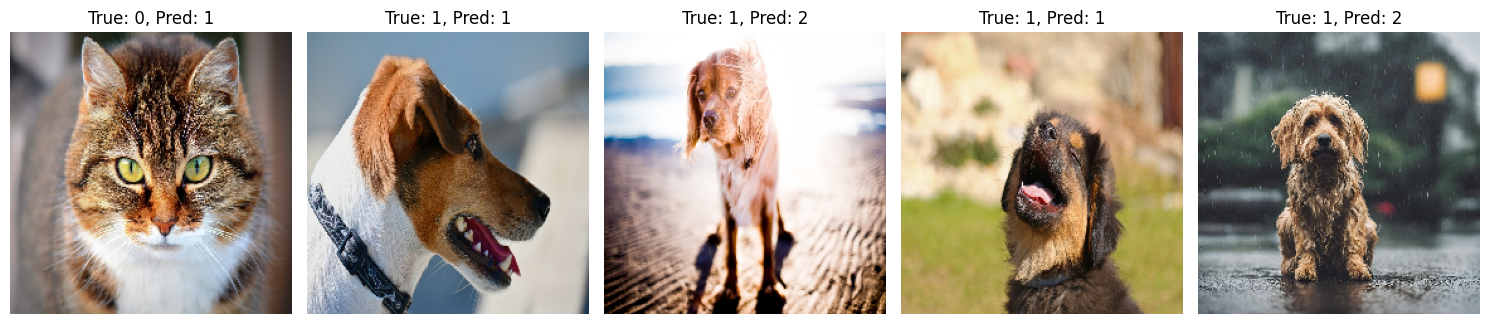

In [38]:
# Next, modify the code to display the misclassified images:
# Display a few misclassified images
num_display = 5  # Adjust the number of images to display
plt.figure(figsize=(15, 10))

# Reset the generator to start from the beginning
validation_generator.reset()

for i, index in enumerate(misclassified_indices[:num_display]):
    # Get the batch and index of the misclassified image
    batch_index = index // validation_generator.batch_size
    within_batch_index = index % validation_generator.batch_size

    # Fetch the batch of data
    validation_generator.batch_index = batch_index
    images, labels = next(validation_generator)

    # Get the specific misclassified image and its true and predicted labels
    misclassified_image = images[within_batch_index]
    true_label = np.argmax(labels[within_batch_index])
    predicted_label = predicted_classes[index]

    plt.subplot(1, num_display, i+1)
    plt.imshow(misclassified_image)
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
